---
## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

# `Py3` - *Librería de manipulación y análisis de datos Pandas*

> **Pandas** es una útil y popular librería de manipulación de datos que ofrece estructuras de datos para el análisis de tablas numéricas y series de tiempo. Esta es una introducción al objeto `DataFrame` y otras características básicas.

---

## Librería Pandas

Para trabajar con una gran cantidad de datos, es deseable un conjunto de herramientas que nos permitan efectuar operaciones comunes de forma intuitiva y eficiente. Pandas, es la solución por defecto para hacerlo en Python, y es parte del ecosistema de SciPy. Viene instalado con Anaconda.

**Nota 0**: La documentación oficial está en [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/).

Esta guía está basada en ["10 minutes to pandas"](https://pandas.pydata.org/docs/getting_started/10min.html).

**Nota 1**: Para toda esta guía se hará la siguiente importación de librerías.

**Nota 2**: Por convención, el *alias* de Pandas es `pd`.

In [1]:
import numpy as np
import pandas as pd
import datetime

---
## 3.1. - `Series`

En Python, las `Series` corresponden a un arreglo de **una** dimensión que admite diversos tipos de datos (números enteros, palabras, números flotantes, objetos de Python, etc.) y que además están etiquetados mediante un índice que el usuario puede definir o permitir que Python lo cree por defecto. 

Para crear listas o `Series` de valores se utiliza la siguiente sintaxis, según la [documentación](https://pandas.pydata.org/docs/reference/api/pandas.Series.html):

```python
pandas.Series(data=None, index=None, 
              dtype=None, name=None, copy=False, fastpath=False)
```

donde `data` es una secuencia iterable, como una lista, tupla o diccionario. El siguiente ejemplo tiene indexado automático.

In [4]:
s = pd.Series([1, 3, 5, np.nan, "modelos", 8.5])
print(s)

0          1
1          3
2          5
3        NaN
4    modelos
5        8.5
dtype: object

Utilizado el comando de NumPy `random.randn` es posible generar datos aleatorios para la lista. También es posible agregar índices distintos a los numéricos, utilizando el argumento `index` y una lista de índice del mismo tamaño que los datos.

In [6]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

p = pd.Series([1, '!', 5, '?', "hola", 13], index=[6, 5, 4, 3, 2, 1])
print(p)

q = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
print(q)

a    0.180461
b   -0.362454
c   -1.034946
d    1.030457
e    0.791476
dtype: float64
6       1
5       !
4       5
3       ?
2    hola
1      13
dtype: object
a    0
b    1
c    2
d    3
e    4
dtype: int64


Una vez creada la `Serie` se pueden ejecutar operaciones vectoriales con la misma o agregar otros atributos, como un nombre.

In [10]:
d = pd.Series(q + q, name='suma')
print(d)

e = pd.Series(q**2, name='potencia')
print(e)

a    0
b    2
c    4
d    6
e    8
Name: suma, dtype: int64
a     0
b     1
c     4
d     9
e    16
Name: potencia, dtype: int64


---
## 3.2. - `DataFrame`

En Pandas, un `DataFrame` corresponde a un arreglo de **dos dimensiones**, etiquetado, semejante a concatenar varias `Series`. También admite varios tipos de datos. 

> Un `DataFrame` tiene una funcionalidad equivalente a una hoja de cálculo o una tabla SQL y permite manipular datos de forma versátil y eficiente. 

La sintaxis de un `DataFrame`, según la [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), es:

```python
pandas.DataFrame(data=None, index=None, 
                 columns=None, dtype=None, copy=None)
```

La asignación de las etiquetas puede ser decidida por el usuario y Python hará coincidir los valores, en caso de diferencias en los tamaños de las listas agregadas, rellenará esos espacios siguiendo reglas de sentido común. 

A continuación un ejemplo de dos `Series` de diferentes tamaños. Observar las diferencias en el orden de los índices.

In [11]:
# Creación de un diccionario con las series indexadas
d = {'esta': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'otra': pd.Series([1., 2., 3., 4.], index=['c', 'a', 'd', 'b'])}

# Creación del DataFrame a partir del diccionario
df = pd.DataFrame(d)

df

,esta,otra
a,1.0,2.0
b,2.0,4.0
c,3.0,1.0
d,NaN,3.0


Estos indices también pueden indicar una estampa de tiempo (*timestamp*), tal como se muestra en el siguiente ejemplo:

In [12]:
# Creación de un rango de fechas
fechas = pd.date_range('20200101', periods=6)

# Creación de un DataFrame con las fechas como índices
df = pd.DataFrame(np.random.randn(6, 4), index=fechas, columns=list('ABCD'))

df    

,A,B,C,D
2020-01-01,0.054024,0.995983,-0.458663,-1.393894
2020-01-02,-0.421339,0.442980,1.630760,0.931616
2020-01-03,0.597642,-1.062983,1.154788,-0.496550
2020-01-04,0.927612,1.427476,0.360535,-0.937408
2020-01-05,-0.433599,-0.863026,0.398420,1.646637
2020-01-06,0.574550,1.659747,-0.072831,-0.551544


##### `DataFrame` con distintos tipos de datos

Como en las `Series`, los `DataFrame` pueden utilizar diferentes tipos de datos en cada columna y asignarse como diccionarios.

In [13]:
df = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20200101'),
                   'C': pd.Series(1, index=list(range(4))),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['norte', 'sur', 'este', 'oeste']),
                   'F': 'hola'
                  })

df

,A,B,C,D,E,F
0,1.0,2020-01-01,1,3,norte,hola
1,1.0,2020-01-01,1,3,sur,hola
2,1.0,2020-01-01,1,3,este,hola
3,1.0,2020-01-01,1,3,oeste,hola


Una vez incializado el `DataFrame`, se pueden ejecutar acciones como extraer, eliminar e insertar columnas, con una sintaxis similar a la de los [diccionarios](https://www.w3schools.com/python/python_dictionaries.asp).

In [14]:
# Extraer una columna
df['E']

0    norte
1      sur
2     este
3    oeste
Name: E, dtype: category
Categories (4, object): ['este', 'norte', 'oeste', 'sur']

In [15]:
# Eliminar columna 'F'
del df['F']

# Mostrar nuevo DataFrame sin columna 'F'
df

,A,B,C,D,E
0,1.0,2020-01-01,1,3,norte
1,1.0,2020-01-01,1,3,sur
2,1.0,2020-01-01,1,3,este
3,1.0,2020-01-01,1,3,oeste


In [16]:
# Asignar nuevos datos a la columna 'A'
df['A'] = pd.Series(np.random.randn(4), index=list(range(4)))

df

,A,B,C,D,E
0,1.531823,2020-01-01,1,3,norte
1,-0.350675,2020-01-01,1,3,sur
2,-0.674739,2020-01-01,1,3,este
3,-0.263439,2020-01-01,1,3,oeste


In [17]:
# Crear nueva columna 'A+' y agregar valores según criterio
df['A+'] = df['A'] > 0

# Mostrar nuevo DataFrame
df

,A,B,C,D,E,A+
0,1.531823,2020-01-01,1,3,norte,True
1,-0.350675,2020-01-01,1,3,sur,False
2,-0.674739,2020-01-01,1,3,este,False
3,-0.263439,2020-01-01,1,3,oeste,False


---
## 3.3. - Visualizar datos

Es posible (y útil) "echar un vistazo" a los primeros y últimos datos. Por ejemplo, del `DataFrame` llamado `df` se pueden ver las primeras **N** filas de datos con el comando `head`.

In [18]:
df.head(2)

,A,B,C,D,E,A+
0,1.531823,2020-01-01,1,3,norte,True
1,-0.350675,2020-01-01,1,3,sur,False


Si solamente se desea visualizar las útimas tres líneas se utiliza el comando `tail`:

In [19]:
df.tail(3)

,A,B,C,D,E,A+
1,-0.350675,2020-01-01,1,3,sur,False
2,-0.674739,2020-01-01,1,3,este,False
3,-0.263439,2020-01-01,1,3,oeste,False


Para visualizar los índices, se utiliza:

In [20]:
df.index

Int64Index([0, 1, 2, 3], dtype='int64')

##### Convertir a NumPy

Cuando sea deseable, se puede transformar el `DataFrame` a NumPy.

In [21]:
df.to_numpy()

array([[1.5318225015679567, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'norte', True],
       [-0.3506750829354323, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'sur', False],
       [-0.6747392253882148, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'este', False],
       [-0.2634392854695947, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'oeste', False]], dtype=object)

Lo anterior tanto si el `DataFrame` tiene un solo tipo o diversos tipos de datos.

##### Manipulación para `DataFrame` de un solo tipo de datos

Sin embargo, si todos los elementos son del mismo tipo, se pueden ejecutar más funciones de análisis y manipulación.

In [24]:
df_num = pd.DataFrame(np.random.randn(6, 4), columns=list("ABCD"), index=['a', 'b', 'c', 'd', 'e', 'f'])

df_num

,A,B,C,D
a,0.064366,0.537548,-0.956708,-1.139084
b,-2.118089,0.520423,0.922732,0.305020
c,-0.504275,-0.420013,0.777851,-0.712328
d,-0.763546,0.699212,-0.575328,-0.350284
e,0.633911,1.338520,1.544018,-0.167981
f,1.305095,-0.326735,1.105860,-1.241392


Es posible obtener una descripción de las principales características estadísticas de cada columna, en este caso el conteo de elementos, la media, la desviación estándar, el valor mínimo, el primer, segundo y tercer cuartil, y el valor máximo.

In [25]:
df_num.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.230423,0.391492,0.469738,-0.551008
std,1.192836,0.663913,0.998577,0.594688
min,-2.118089,-0.420013,-0.956708,-1.241392
25%,-0.698728,-0.114946,-0.237034,-1.032395
50%,-0.219955,0.528986,0.850292,-0.531306
75%,0.491525,0.658796,1.060078,-0.213557
max,1.305095,1.338520,1.544018,0.305020


O también reordenar los datos con alguna columna de referencia:

In [26]:
df_num.sort_values(by='B')

,A,B,C,D
c,-0.504275,-0.420013,0.777851,-0.712328
f,1.305095,-0.326735,1.105860,-1.241392
b,-2.118089,0.520423,0.922732,0.305020
a,0.064366,0.537548,-0.956708,-1.139084
d,-0.763546,0.699212,-0.575328,-0.350284
e,0.633911,1.338520,1.544018,-0.167981


---
## 3.4. - Seleccionar datos

En Python, la selección (o búsqueda) de datos utilizando Pandas es más eficiente que las expresiones para seleccionar y obtener datos en NumPy. Por ejemplo, para ubicar una **fila** de datos, se puede utilizar el comando  `loc`, que tiene muchas opciones para buscar índices, según la [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html):

In [27]:
df.loc[2]

A               -0.674739
B     2020-01-01 00:00:00
C                       1
D                       3
E                    este
A+                  False
Name: 2, dtype: object

También se pueden seleccionar un rango de columnas al mismo tiempo:

In [28]:
df[0:3]

,A,B,C,D,E,A+
0,1.531823,2020-01-01,1,3,norte,True
1,-0.350675,2020-01-01,1,3,sur,False
2,-0.674739,2020-01-01,1,3,este,False


Para obtener una posición en específico, se debe indicar la fila y la columna mediante el comando `at`:

In [29]:
df.at[2, 'E']

'este'

Se puede ubicar ese mismo elemento por medio de la posición y no los índices, utilizando el comando `iloc`:

In [30]:
df.iloc[2, 4]

'este'

Se pueden ubicar los datos que cumplan con cierta condición booleana:

In [31]:
df[df['A'] > 0]

,A,B,C,D,E,A+
0,1.531823,2020-01-01,1,3,norte,True


---
## 3.5. - Operaciones sobre datos

En Python, las operaciones se ejecutan sobre todos los datos arrojando el valor de salida por filas o columnas, por ejemplo para calcular la media estadística de los datos de cada columna, se utiliza el comando `mean` de la siguiente manera:

In [32]:
df_num.mean()

A   -0.230423
B    0.391492
C    0.469738
D   -0.551008
dtype: float64

Si en cambio se desea conocer la media de los valores por filas, se utiliza la siguiente variación:

In [33]:
df_num.mean(1)

a   -0.373469
b   -0.092479
c   -0.214692
d   -0.247487
e    0.837117
f    0.210707
dtype: float64

Para la siguiente serie de ejemplo:

In [35]:
serie = pd.Series(np.random.randint(0, 6, size=10))
serie

0    4
1    3
2    1
3    5
4    4
5    0
6    2
7    0
8    5
9    1
dtype: int64

También se pueden aplicar operaciones tales como el conteo (o "apariciones de cada uno") sobre `Series` o `DataFrame`, y devuelve un resultado clasificado de mayor a menor número de ocurrencias.

In [36]:
serie.value_counts()

0    2
1    2
4    2
5    2
2    1
3    1
dtype: int64

In [37]:
df.value_counts(df['A+'])

A+
False    3
True     1
dtype: int64

##### Operaciones sobre caracteres

También existen operaciones que se pueden aplicar sobre `Series` de palabras:

In [38]:
g = pd.Series(['ÁRbOL', 'BLanCO', 'AvE', 'BuRRo', np.nan])

print(g)
print(g.str.lower())

0     ÁRbOL
1    BLanCO
2       AvE
3     BuRRo
4       NaN
dtype: object
0     árbol
1    blanco
2       ave
3     burro
4       NaN
dtype: object


---
## 3.6. - Fusionar datos

En Pandas, para concatenar datos se utiliza el comando `concat()` de la siguiente forma:

In [39]:
# Crear DataFrame de ejemplo
df_a = pd.DataFrame(np.random.randn(10,2))
df_b = pd.DataFrame(np.random.randn(10,2))

# Extraer fragmentos y concatenarlos
fragmentos = [df_a[:], df_b[:]]
pd.concat(fragmentos)

,0,1
0,0.494690,-0.277059
1,-2.593233,0.316510
2,1.397656,1.354427
3,-0.236178,0.294733
4,-0.429791,0.861325
5,-0.873177,2.115258
6,-1.740923,-1.342255
7,-0.364168,-0.507371
8,0.974522,0.673948
9,0.807321,-0.924700


**Nota**: Observar que es necesario extraer los fragmentos primero porque no se pueden concatenar `DataFrame` directamente.

---
## 3.7. - Agrupar datos

En Pandar, "agrupar" se refiere a:

- Separar los datos en grupos basándose en un criterio.
- Aplicar una función a cada grupo independientemente.
- Combinar los resultados en una estructura de datos.

A continuación hay un ejemplo de agrupación aplicando una suma a las columnas numéricas asociadas por cierto criterio:

In [40]:
df_foo = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo'],
                       'B': ['uno', 'dos', 'dos', 'tres', 'dos'],
                       'C': np.random.randn(5),
                       'D': np.random.randn(5)})
df_foo

,A,B,C,D
0,foo,uno,-1.992679,-2.350810
1,bar,dos,1.395616,-0.561402
2,foo,dos,-0.078123,1.170234
3,bar,tres,-1.120732,0.243306
4,foo,dos,1.820536,1.103645


El siguiente resultado agrupa las filas según los elementos en `A` y suma los resultados de las columnas no categóricas (es decir, numéricas), que en este caso son `C` y `D`.

In [41]:
df_foo.groupby('A').sum()

,C,D
A,,
bar,0.274883,-0.318096
foo,-0.250266,-0.076931


El siguiente resultado agrupa primero por `A` y luego por `B`, para finalmente sumar las columnas `C` y `D` asociadas.

In [42]:
df_foo.groupby(['A', 'B']).sum()

C         D
A   B                       
bar dos   1.395616 -0.561402
    tres -1.120732  0.243306
foo dos   1.742414  2.273879
    uno  -1.992679 -2.350810

---
## 3.8. - Reacomodar datos

En Pandas, una forma de reacomodar los datos es mediante el comando `stack`:

In [43]:
pila = df.stack()

pila

0  A                1.531823
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                   norte
   A+                   True
1  A               -0.350675
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                     sur
   A+                  False
2  A               -0.674739
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                    este
   A+                  False
3  A               -0.263439
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                   oeste
   A+                  False
dtype: object

También se puede cambiar la forma de ordenar los datos como tablas de pivot:

In [44]:
df_piv = pd.DataFrame({'A': ['uno', 'uno', 'dos', 'tres']*3,
                       'B': ['A', 'B', 'C']*4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar']*2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df_piv

,A,B,C,D,E
0,uno,A,foo,-0.674208,-1.175795
1,uno,B,foo,-0.809279,-1.380663
2,dos,C,foo,-1.814228,2.559254
3,tres,A,bar,-0.232115,0.750973
4,uno,B,bar,-0.356912,-0.055865
5,uno,C,bar,-0.957566,0.233600
6,dos,A,foo,-1.916035,1.890845
7,tres,B,foo,-0.153507,-0.179204
8,uno,C,foo,0.264358,0.578200
9,uno,A,bar,0.546380,-1.065422


En la siguiente tabla va a sumar los valores en `D` asociados con la agrupación con respecto a `A` y `B`, para cada categoría en `C`. Es una herramienta poderosa.

In [46]:
v = pd.pivot_table(df_piv, values='D', index=['A', 'B'], columns=['C'])
v

C            bar       foo
A    B                    
dos  A       NaN -1.916035
     B -0.281571       NaN
     C       NaN -1.814228
tres A -0.232115       NaN
     B       NaN -0.153507
     C -2.130357       NaN
uno  A  0.546380 -0.674208
     B -0.356912 -0.809279
     C -0.957566  0.264358

In [53]:
# Extraer un elemento

v['bar']['dos']['B']

-0.28157067879160885

---
## 3.9. - Series de tiempo

En Pandas, las series de tiempo permiten generar secuencias con una frecuencia fija en un lapso de tiempo, como por ejemplo:

In [ ]:
# Tres ciclos horarios que inician el 1 de enero de 2020
dti = pd.date_range('1-1-2020', periods=3, freq='H')
dti

Cuya hora se puede convertir a una zona horaria diferente, como *Central Time*:

In [ ]:
dti = dti.tz_convert('America/Costa_Rica')
dti

También se pueden convertir una serie de tiempo a una frecuencia particular:

In [ ]:
idx = pd.date_range('2020-01-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts

In [ ]:
ts.resample('2H').mean()

---
## 3.10. - Gráficas

En Python, se utiliza la asignación estándar para utilizar los comandos del API de `matplotlib` como métodos de la `Series` y `DataFrame`. Así, por ejemplo, se puede graficar una `Serie` de datos:

Text(0, 0.5, 'Valor')

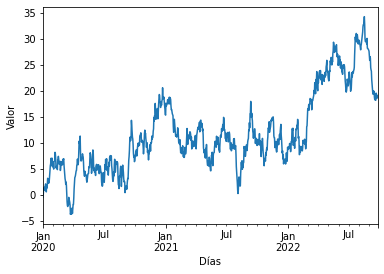

In [54]:
import matplotlib.pyplot as plt

plt.close('all')

# Crear serie temporal
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2020', periods=1000))

# Suma acumulada
ts = ts.cumsum()

# Método .plot() de Matplotlib sobre la serie temporal
ts.plot()
plt.xlabel('Días')
plt.ylabel('Valor')

También se pueden graficar arreglos del tipo `DataFrame` de manera que se grafican varias curvas en una misma gráfica como se muestra a continuación:

Text(0, 0.5, 'Valor')

<Figure size 432x288 with 0 Axes>

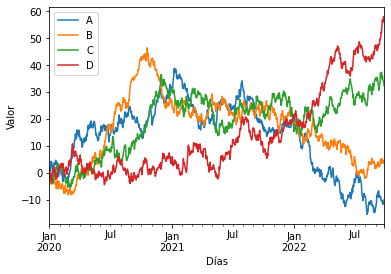

In [55]:
# Crear números aleatorias con el mísmo índice de ts
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

# Graficar las curvas
plt.figure()
df.plot()
plt.legend(loc='best')
plt.xlabel('Días')
plt.ylabel('Valor')

---
## 3.11. - Importar y exportar datos

Pandas es un excelente "manejador" de archivos externos de datos, tipo `.xls` o `.csv`. Por ejemplo, para crear un archivo `modelos.csv` a partir de los datos anteriores:

In [ ]:
df.to_csv('modelos')

Cuyo contenido se puede "llamar" nuevamente utilizando el comando, que lo guarda como un `DataFrame`.

In [ ]:
pd.read_csv('modelos')

---
### Más información

* [Página oficial de Pandas](https://pandas.pydata.org/)

---

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---